In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Training Dataset/training datalist.csv')
display(df.head())

,ID,Sex,Age,Disease category,Narrow pitch range,Decreased volume,Fatigue,Dryness,Lumping,heartburn,...,Onset of dysphonia,Noise at work,Occupational vocal demand,Diabetes,Hypertension,CAD,Head and Neck Cancer,Head injury,CVA,Voice handicap index - 10
0,1202f15,2,39,1,1,1,1,1,1,0,...,2,3,1,0,0,0,0,0,0,22.0
1,0600ve0,1,69,2,1,1,1,1,0,0,...,2,1,3,0,0,0,0,0,1,19.0
2,1001o7l,2,59,2,1,1,1,1,0,0,...,2,3,4,0,0,0,0,0,0,18.0
3,1201c1t,2,47,1,1,0,1,1,1,0,...,3,1,1,0,0,0,0,0,0,27.0
4,0402jvt,1,87,1,0,0,0,0,0,0,...,1,1,4,0,1,0,0,0,0,16.0


In [3]:
# data cleaning
df['PPD'].fillna(0, inplace=True)
df.dropna(subset=['Voice handicap index - 10'], inplace=True)
# df.info()
df.reset_index(drop=True, inplace=True)

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(['ID', 'Disease category'], axis=1)
y = df['Disease category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [5]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train.values, y_train.values)

y_pred = forest.predict(X_test.values)

In [6]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test.values, y_pred)
precision = precision_score(y_test.values, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test.values, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test.values, y_pred, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy.round(2)}")
print(f"Precision: {precision.round(2)}")
print(f"Recall: {recall.round(2)}")
print(f"F1: {f1.round(2)}")

print(classification_report(y_test.values, y_pred, zero_division=1))
print(confusion_matrix(y_test.values, y_pred))

Accuracy: 0.65
Precision: 0.62
Recall: 0.65
F1: 0.62
              precision    recall  f1-score   support

           1       0.69      0.90      0.78       153
           2       0.44      0.38      0.41        64
           3       0.78      0.53      0.63        59
           4       0.50      0.09      0.15        11
           5       0.00      0.00      0.00        11

    accuracy                           0.65       298
   macro avg       0.48      0.38      0.39       298
weighted avg       0.62      0.65      0.62       298

[[138  11   3   1   0]
 [ 33  24   6   0   1]
 [ 15  13  31   0   0]
 [  5   5   0   1   0]
 [ 10   1   0   0   0]]


[0.04926458 0.17883253 0.02647007 0.03096768 0.02532709 0.02941266
 0.02323991 0.01103302 0.04342148 0.01689408 0.02144949 0.03406439
 0.021846   0.01956228 0.02197394 0.04798444 0.08034915 0.04316982
 0.08727596 0.0088916  0.01345433 0.01094116 0.01403788 0.00160517
 0.00153131 0.13699998]
[ 1 25 18 16  0 15  8 17 11  3  5  2  4  6 14 12 10 13  9 22 20  7 21 19
 23 24]
Feature ranking:
1. feature Age (0.18)
2. feature Voice handicap index - 10 (0.14)
3. feature Occupational vocal demand (0.09)
4. feature Onset of dysphonia  (0.08)
5. feature Sex (0.05)
6. feature Diurnal pattern (0.05)
7. feature Choking (0.04)
8. feature Noise at work (0.04)
9. feature Smoking (0.03)
10. feature Decreased volume (0.03)
11. feature Dryness (0.03)
12. feature Narrow pitch range (0.03)
13. feature Fatigue (0.03)
14. feature Lumping (0.02)
15. feature frequency (0.02)
16. feature PPD (0.02)
17. feature PND (0.02)
18. feature Drinking (0.02)
19. feature Eye dryness (0.02)
20. feature Head and Neck Cancer 

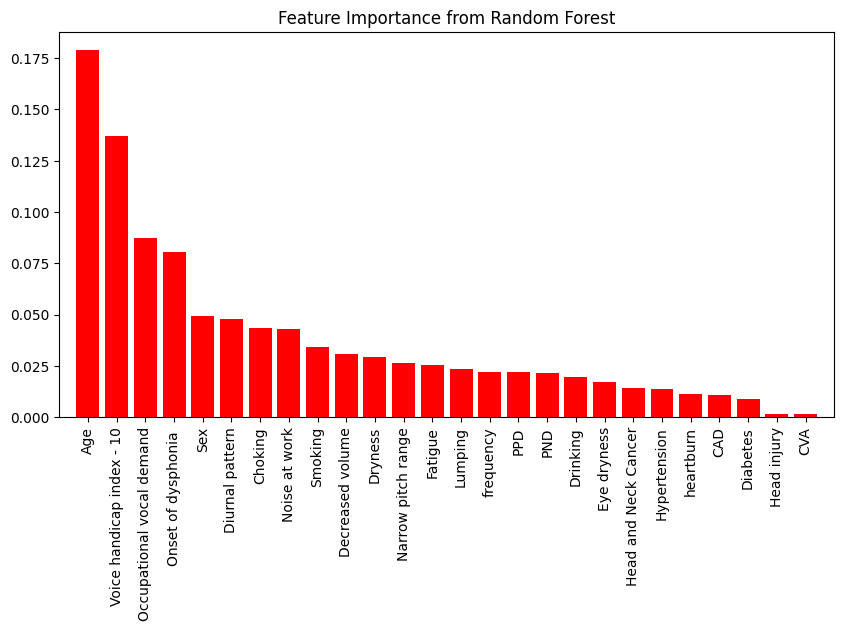

In [7]:
features = X.columns.to_list()

# get the importance of each feature
importances = forest.feature_importances_

print(importances)

indices = np.argsort(importances)[::-1]

print(indices)

# Print the feature ranking
print("Feature ranking:")

# print(X_train.shape[1])

for f in range(X.shape[1]):
    print(f"{f + 1}. feature {features[indices[f]]} ({importances[indices[f]].round(2)})")

# Plot the feature importances of the forest
plt.figure(figsize=(10, 5))
plt.title("Feature Importance from Random Forest")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [8]:
# Get the top 10 features
top_10_features = [features[i] for i in indices[:10]]
print(top_10_features)

['Age', 'Voice handicap index - 10', 'Occupational vocal demand', 'Onset of dysphonia ', 'Sex', 'Diurnal pattern', 'Choking', 'Noise at work', 'Smoking', 'Decreased volume']


In [9]:
# Get the least 5 features
least_5_features = [features[i] for i in indices[-5:]]
print(least_5_features)

['heartburn', 'CAD', 'Diabetes', 'Head injury', 'CVA']
